# Minist Dataset Example
In this project I'm going over classying the minist dataset using different algorithms. 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

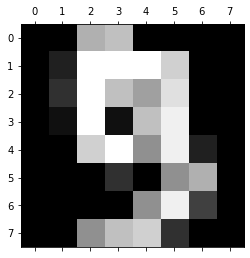

In [6]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[9]) 
plt.show() 

In [16]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])